### Credit Card Approval Prediction Analysis

## Data Mining Project (ISM 6136) - Credit Card Approval- Prediction Analysis
Group name- DM ISM 6136
###### Chandan Patel- U17437715
###### Srinidhi - U767346476
###### Nandini - U32688649
###### Priyam - U88016402
###### Shuvrangshu Mukopadhyay - U22369642

#### Problem Statment
A Commercial bank wants to automate the Credit Card eligibility process based on customer detail provided while filling online application form & Credit history of customers.

Banks receive a lot of applications for issuance of credit cards. Many of them rejected for many reasons, like high-loan balances, low-income levels, or too many inquiries on an individual’s credit report. Manually analyzing these applications is error-prone and a time-consuming process. This task can be automated with the power of machine learning, In this project, we will be build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.

This business challenge is to identify the customers segments which are eligible for Credit Card approval, so that they can specifically target these customers.


#### Addressing- Businees Issues
In contrast to other projects, the definition of "eligible" or "not eligible" is not provided, thus we will create a machine learning model to predict whether an applicant is an "eligible" or "not eligible" customer for a credit card. To create our label, we will analyze the datasets. We will also attempt to address the significant issue of unbalanced data in this work in order to develop a more accurate predictive model.

The structure of this notebook is as follows:

1.First, we will start off by loading and viewing the datasets.

2.We will see that the datasets have a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.

3.We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.

4.After our data is in good shape, we will do some exploratory data analysis to build our intuitions.

5.Finally, we will build the best machine learning model that can predict if an individual's application for a credit card will be accepted by understanding a good or bad applicant.

### Step 1: Important necessary packages and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import warnings
import datetime
from datetime import timedelta
warnings.filterwarnings('ignore')
random_seed = 1
np.random.seed(random_seed)


credit_record = pd.read_csv('D:/BAIS/archive (1)/credit_record.csv')
application_record = pd.read_csv('D:/BAIS/archive (1)/application_record.csv')
print(application_record.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

### Step 2: Data Pre-Processing

#### 2.1 Data Exploration & Exploratory Data Analysis

In [3]:
print(application_record.shape, credit_record.shape)

(438557, 18) (1048575, 3)


##### let's explore application records

In [4]:
application_record['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [5]:
# dropping occupation type which has many null values (almost 33% of the data is missing)
application_record.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [6]:
# Checking duplicates in 'ID' column
len(application_record['ID']) - len(application_record['ID'].unique())

47

In [7]:
# Dropping duplicate entries from ID column
application_record = application_record.drop_duplicates('ID', keep='last') 

In [8]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [9]:
# Checking Min , Max values from 'DAYS_BIRTH' column
print('Min DAYS_BIRTH :', application_record['DAYS_BIRTH'].min(),'\nMax DAYS_BIRTH :', application_record['DAYS_BIRTH'].max())

Min DAYS_BIRTH : -25201 
Max DAYS_BIRTH : -7489


In [10]:
# Converting 'DAYS_BIRTH' values from Day to Years
application_record['DAYS_BIRTH'] = round(application_record['DAYS_BIRTH']/-365,0)
application_record.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [11]:
# Checking unique values greater than 0
application_record[application_record['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()
# 365243
# As mentioned in document, if 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0
application_record['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)
# Converting 'DAYS_EMPLOYED' values from Day to Years
application_record['DAYS_EMPLOYED'] = abs(round(application_record['DAYS_EMPLOYED']/-365,0))
application_record.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)   

In [12]:
application_record['FLAG_MOBIL'].value_counts()

1    438510
Name: FLAG_MOBIL, dtype: int64

In [13]:
# As all the values in 'Flag_Mobil' column are 1, hence dropping column
application_record.drop('FLAG_MOBIL', axis=1, inplace=True)

##### let's explore credit record data

In [14]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [15]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [16]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


<AxesSubplot:xlabel='STATUS', ylabel='MONTHS_BALANCE'>

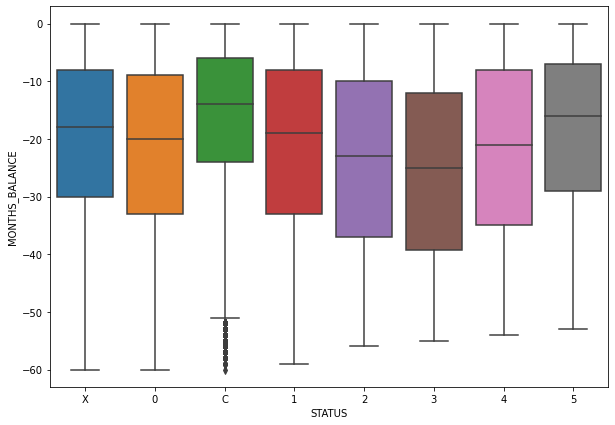

In [17]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=credit_record['STATUS'], y=credit_record['MONTHS_BALANCE'])

Outliers in Months_Balance are found in approved class than rejected. Hence removing extreme values might not affect the model performance in detecting the ineligible cases

In [18]:
# categorizing 'STATUS' column to binary classification   1 : Eligible Client and 0 : Not Eligible client
#credit_record['STATUS'].replace(['C', 'X'],1, inplace=True)

In [19]:
#credit_record['STATUS'].replace(['1','2','3','4','5'],0, inplace=True)

<AxesSubplot:xlabel='STATUS'>

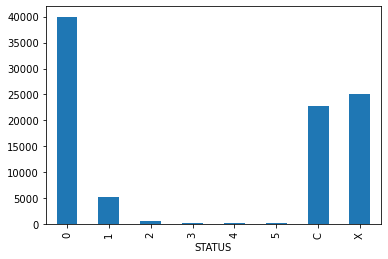

In [20]:
credit_record.groupby('STATUS').count()
grouped=credit_record.groupby('ID')['STATUS'].value_counts()
number_of_customer_for_each_status=grouped.groupby('STATUS').count()
number_of_customer_for_each_status.plot(kind='bar')

In [21]:
# categorizing 'STATUS' column to binary classification   0 : Eligible Client and 1 : Ineligible client
credit_record['STATUS'].replace(['C', 'X'],0, inplace=True)

In [22]:
credit_record['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [23]:
credit_record['STATUS'] = credit_record['STATUS'].astype('int64')

In [24]:
credit_df = credit_record.groupby('ID').agg(max).reset_index()

In [25]:
credit_df['STATUS'].value_counts()

0    40635
1     5350
Name: STATUS, dtype: int64

In [26]:
# merging the two datasets based on 'ID'
df = pd.merge(application_record, credit_df, on='ID', how='inner')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,0,0,2.0,0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,0,0,2.0,0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,0,0,0,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,0,1,1,1.0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,0,1,1,1.0,-22,0


In [27]:
df.shape

(36457, 18)

In [28]:
# dropping 'ID' column as it is having only unique values (not required for ML Model)
df.drop('ID', axis=1, inplace=True)

In [29]:
# Dropping duplicate records
df = df.drop_duplicates()
df.reset_index(drop=True ,inplace=True)

In [30]:
df.duplicated().sum()

0

No duplicates found

In [31]:
df.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20876 entries, 0 to 20875
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          20876 non-null  object 
 1   FLAG_OWN_CAR         20876 non-null  object 
 2   FLAG_OWN_REALTY      20876 non-null  object 
 3   CNT_CHILDREN         20876 non-null  int64  
 4   AMT_INCOME_TOTAL     20876 non-null  float64
 5   NAME_INCOME_TYPE     20876 non-null  object 
 6   NAME_EDUCATION_TYPE  20876 non-null  object 
 7   NAME_FAMILY_STATUS   20876 non-null  object 
 8   NAME_HOUSING_TYPE    20876 non-null  object 
 9   AGE_YEARS            20876 non-null  float64
 10  YEARS_EMPLOYED       20876 non-null  float64
 11  FLAG_WORK_PHONE      20876 non-null  int64  
 12  FLAG_PHONE           20876 non-null  int64  
 13  FLAG_EMAIL           20876 non-null  int64  
 14  CNT_FAM_MEMBERS      20876 non-null  float64
 15  MONTHS_BALANCE       20876 non-null 

### Correlation Plot

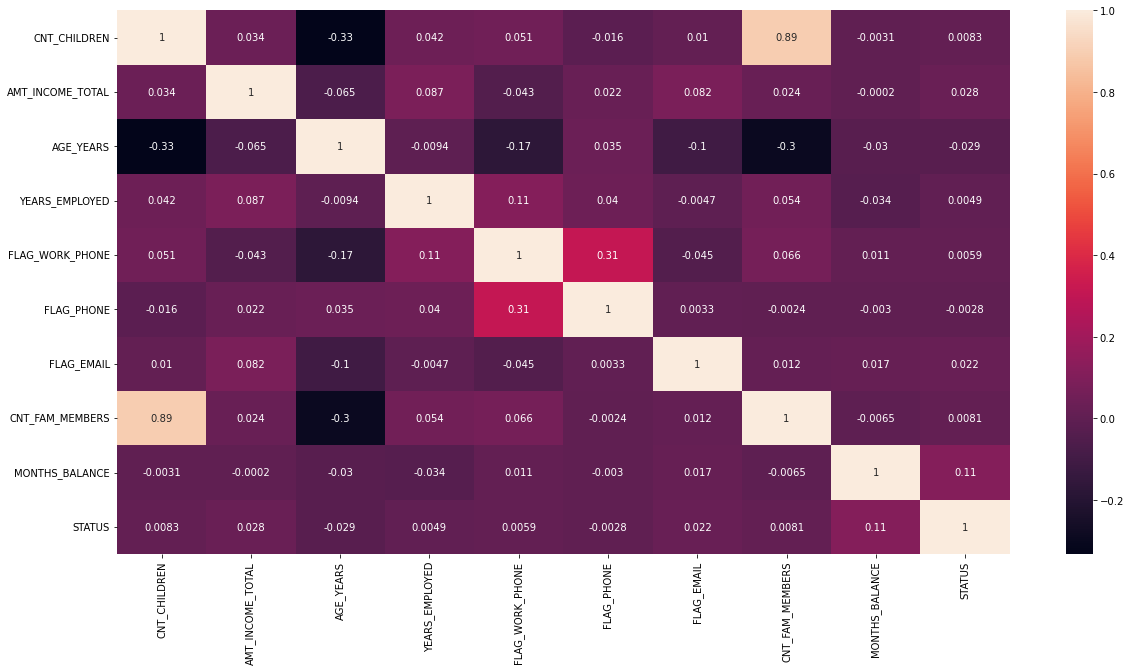

In [33]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'Status'
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

From the above pie chart ,we conclude that majority of people are married so there expenses more than others.so, we have a better chance to approve their credit card as they can use credit card regularly and in efficient manner for their expenses.

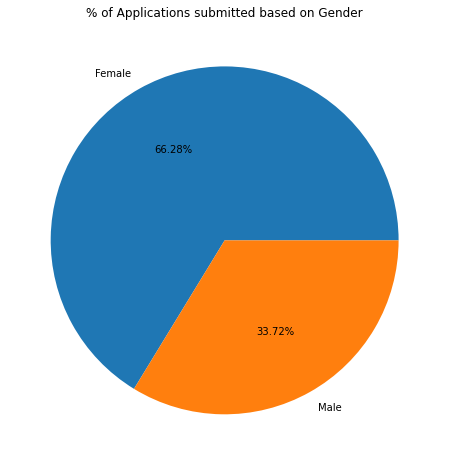

In [34]:
# This graph shows that, majority of application are submitted by Female's
plt.figure(figsize=(8,8))
plt.pie(df['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

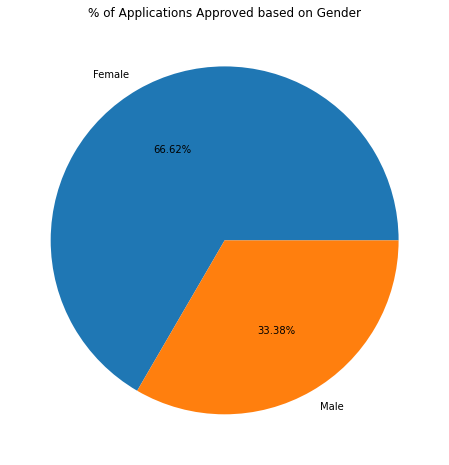

In [35]:
# This graph shows that, majority of application are approved for Female's
plt.figure(figsize=(8,8))
plt.pie(df[df['STATUS']==0]['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

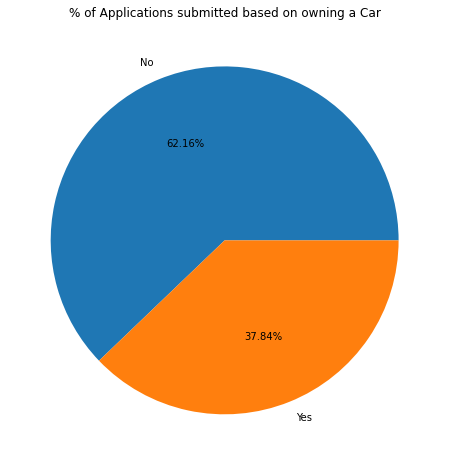

In [36]:
# This graph shows that, majority of applicatant's dont own a car
plt.figure(figsize=(8,8))
plt.pie(df['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

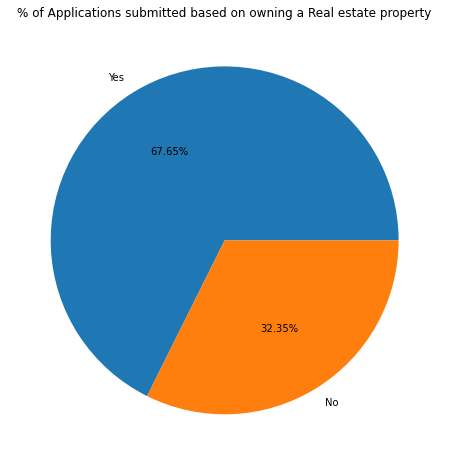

In [37]:
# This graph shows that, majority of applicatant's own a Real Estate property / House
plt.figure(figsize=(8,8))
plt.pie(df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

Majority of applicant's own a real estate property/ House

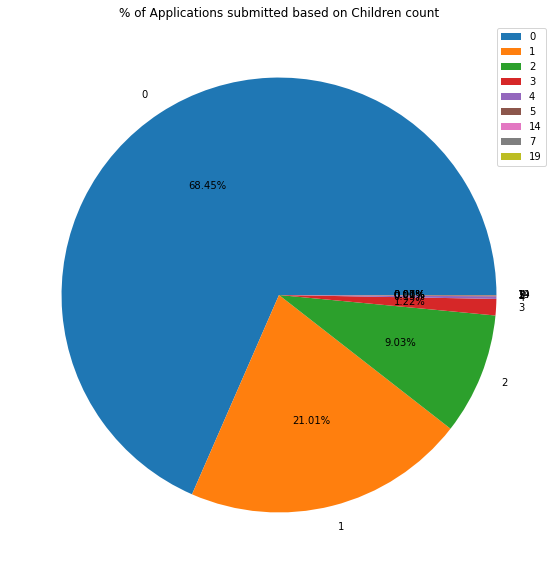

In [38]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (10,10))
plt.pie(df['CNT_CHILDREN'].value_counts(), labels=df['CNT_CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

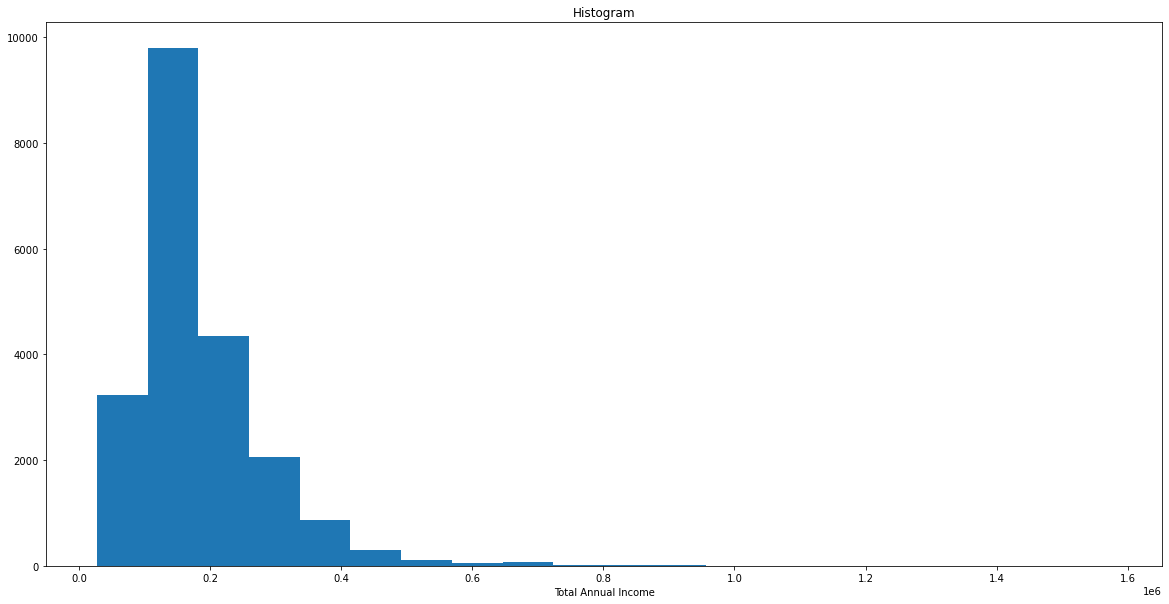

In [40]:
# This graph shows that, majority of applicatant's income lies between 100,000 to 300,000
plt.figure(figsize = (20,10))
plt.hist(df['AMT_INCOME_TOTAL'], bins=20)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

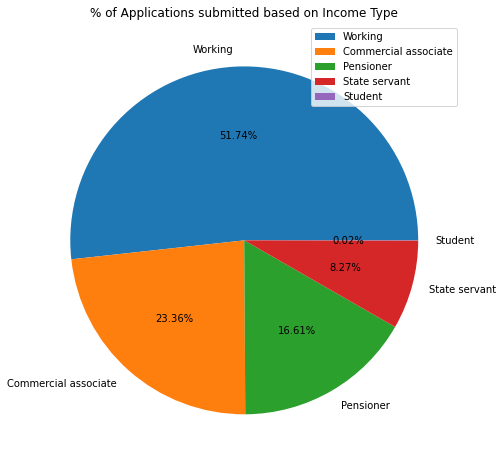

In [41]:
# This graph shows that, majority of applicatant's are working professional
plt.figure(figsize = (8,8))
plt.pie(df['NAME_INCOME_TYPE'].value_counts(), labels=df['NAME_INCOME_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

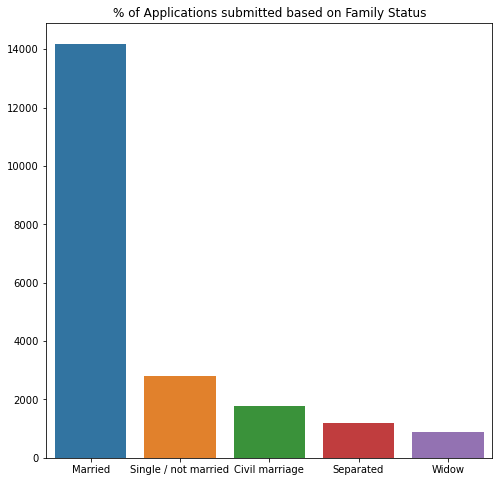

In [292]:
# This graph shows that, majority of applicatant's are married
plt.figure(figsize=(8,8))
sns.barplot(df['NAME_FAMILY_STATUS'].value_counts().index, df['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('% of Applications submitted based on Family Status')
plt.show()

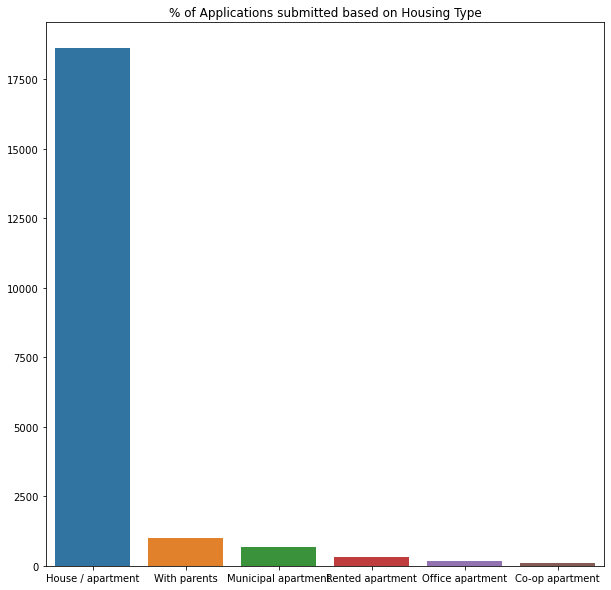

In [293]:
# This graph shows that, majority of applicatant's lives in House / Apartment
plt.figure(figsize=(10,10))
sns.barplot(df['NAME_HOUSING_TYPE'].value_counts().index, df['NAME_HOUSING_TYPE'].value_counts().values)
plt.title('% of Applications submitted based on Housing Type')
plt.show()

In [294]:
cat_columns = df.columns[(df.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [295]:
#Converting all Non-Numerical Columns to Numerical
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        df[col] = globals()['LE_{}'.format(col)].fit_transform(df[col])
df.head()   

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,1,0,0,2.0,0,1
1,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,0,0,0,2.0,0,0
2,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,0,1,1,1.0,0,0
3,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,0,1,1,1.0,-22,0
4,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,0,0,0,1.0,-4,0


In [296]:
df.to_csv('final_Clean_file1.csv')

In [297]:
features = df.drop(['STATUS'], axis=1)
label = df['STATUS']

In [298]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.3,
                                                    random_state = 10)

In [299]:
# scaling all features
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train_scaled = pd.DataFrame(st.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(st.transform(x_test), columns=x_test.columns)

##### Address Data Imbalances


Ratio of the customers approved or eligible: 84.87%
Ratio of the customers not approved or not elgibile: 15.13%


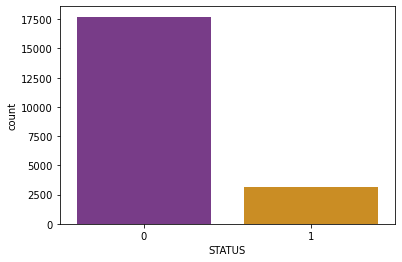

In [307]:
# let's explore the class (target variable)
import seaborn as sns
sns.countplot(df["STATUS"], palette='CMRmap')
eligible = (df["STATUS"].value_counts()[0] / len(df["STATUS"])) * 100
ineligible = (df["STATUS"].value_counts()[1] / len(df["STATUS"])) * 100
print('\nRatio of the customers approved or eligible: %.2f%%' % eligible)
print('Ratio of the customers not approved or not elgibile: %.2f%%' % ineligible)

In [300]:
# adding samples to minority class using SMOTE
# pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [301]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

0    84.910696
1    15.089304
Name: STATUS, dtype: float64

In [302]:
# after using SMOTE 
y_train_oversam.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: STATUS, dtype: float64

#### Trying different classifiers after addressing data imbalances

In [309]:
# Support Vector Machine classification

from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve
svc_model = SVC()

svc_model.fit(x_train_oversam, y_train_oversam)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = svc_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Support Vector Classifier Accuracy :  62.344632768361585 %

Confusion matrix :
[[3180 2130]
 [1869 3441]]

Classification report:
              precision    recall  f1-score   support

           0       0.63      0.60      0.61      5310
           1       0.62      0.65      0.63      5310

    accuracy                           0.62     10620
   macro avg       0.62      0.62      0.62     10620
weighted avg       0.62      0.62      0.62     10620



In [310]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train_oversam, y_train_oversam)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = RandomForest_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Random Forest Model Accuracy :  76.05461393596987 %

Confusion matrix :
[[4395  915]
 [1628 3682]]

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      5310
           1       0.80      0.69      0.74      5310

    accuracy                           0.76     10620
   macro avg       0.77      0.76      0.76     10620
weighted avg       0.77      0.76      0.76     10620



We have performed data pre-processing and exploratory data analysis here in Python. The final cleaned data set is exported and 
ingested into Azure Machine Learning studio for trying different classifiers and thereby identifying the best model.